# Variable transformers : LogCpTransformer


The `LogCpTransformer()` applies the transformation log(x + C), where C is a positive constant, to the input variable. 

It applies the natural logarithm or the base 10 logarithm, where the natural logarithm is logarithm in base e by setting the param `base="e"` or `base="10"`.

The `LogCpTransformer()`  only works with numerical non-negative values after adding a constant C. If the variable contains a zero or a negative value after adding a constant C, the transformer will return an error.

The transformer can automatically find the constant C to each variable by setting `C="auto"`.

A list of variables can be passed as an argument. Alternatively, the transformer will automatically select and transform all variables of type numeric.

In this tutorial we use the boston dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
# from sklearn.datasets import load_boston
from feature_engine.transformation import LogCpTransformer

In [2]:
# Load dataset
X, y = fetch_california_housing(return_X_y=True)
X = pd.DataFrame(X)

# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

The `LogCpTransformer` automatically finds numerical variables in the dataset by setting `variables=None` or pass a list of column names as the example below shows. 

Additionally notice that we define the transformer to automatically find the constant C `C="auto"`. Internally, each variable constant is calculated with the formula `C = abs(min(x)) + 1`.

In [3]:
print("Column names:", list(X_train.columns))
print("\nColumn positions:")
for i, col in enumerate(X_train.columns):
    print(f"{i}: {col}")

Column names: [0, 1, 2, 3, 4, 5, 6, 7]

Column positions:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7


In [4]:
# num_feats = [7, 12]
num_feats = [6, 7]

# set up the variable transformer
tf = LogCpTransformer(variables=num_feats, C="auto")

# fit the transformer
tf.fit(X_train)

# transform the data
train_t= tf.transform(X_train)
test_t= tf.transform(X_test)

We can now visualize the results from the transformation

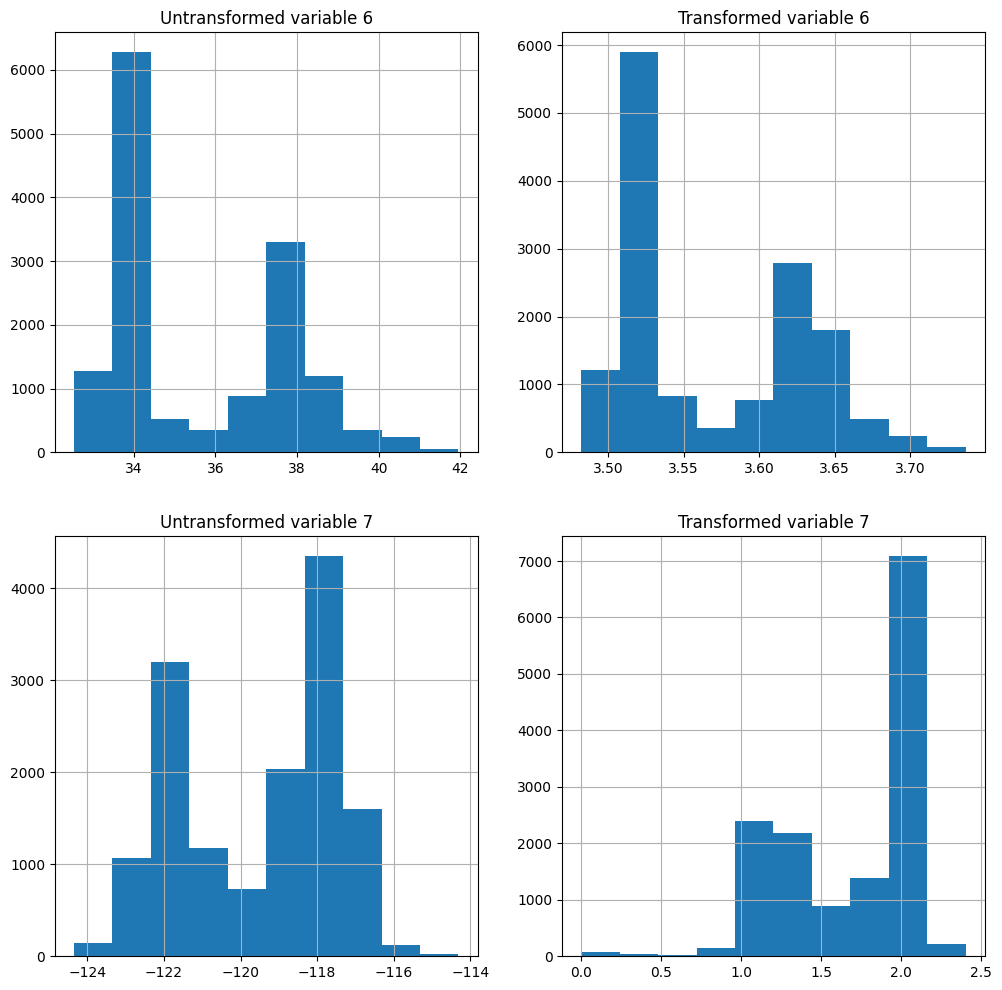

In [5]:
plt.figure(figsize=(12, 12))

for idx, col in enumerate(num_feats, start=1):
    
    # plot un-transformed variable
    plt.subplot(2, 2, round(idx*1.4))
    plt.title(f'Untransformed variable {col}')
    X_train[col].hist()
    
    # plot transformed variable
    plt.subplot(2, 2, idx*2)
    plt.title(f'Transformed variable {col}')
    train_t[col].hist()

One last thing, to verify the transformed variables we can access the transformer `variables_` attribute

In [6]:
tf.variables_

[6, 7]

or the constant `C` applied through the `C_` attribute.

In [7]:
tf.C_

{6: 0, 7: 125.35}